# Data Exploration

The prepared data is ready to be analysed and help us arrive to conclusions about our dataset, allowing for a better understanding of the subject and how it will impact future search system design choices.

Firstly we import all of the relevant packages for the data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import calendar

In [3]:
df = pd.read_json("data/ps_clean.json") #default
ps = pd.read_json("data/ps_clean.json")
psd = pd.read_json("data/psd.json")
ch = pd.read_json("data/chega.json")

df.shape

(13189, 5)

## Webpages and Size

### Number of Webpages per Month per Political Group

In [80]:
def pages_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    pages_per_month = group_by_month.count().reset_index()
    pages_per_month.rename({'date': 'Month', 'text': 'Number of Pages'}, axis='columns', inplace=True)
    pages_per_month['Month'] = pages_per_month['Month'].apply(lambda x: calendar.month_abbr[x])

    return pages_per_month

In [81]:
ps_pages = pages_per_month(ps)
ps_pages 

,Month,Number of Pages
0,Jan,204
1,Feb,257
2,Mar,2031
3,Apr,958
4,May,928
5,Jun,1835
6,Jul,1045
7,Aug,703
8,Sep,1817
9,Oct,1458


In [82]:
psd_pages = pages_per_month(psd)
psd_pages 

,Month,Number of Pages
0,Jan,488
1,Feb,2443
2,Mar,2915
3,Apr,3740
4,May,2447
5,Jun,2227
6,Jul,2955
7,Aug,2350
8,Sep,1130
9,Oct,4061


In [83]:
ch_pages = pages_per_month(ch)
ch_pages 

,Month,Number of Pages
0,Jan,205
1,Feb,113
2,Mar,110
3,Apr,150
4,May,793
5,Jun,567
6,Jul,557
7,Aug,17
8,Sep,38
9,Oct,781


#### Plot:

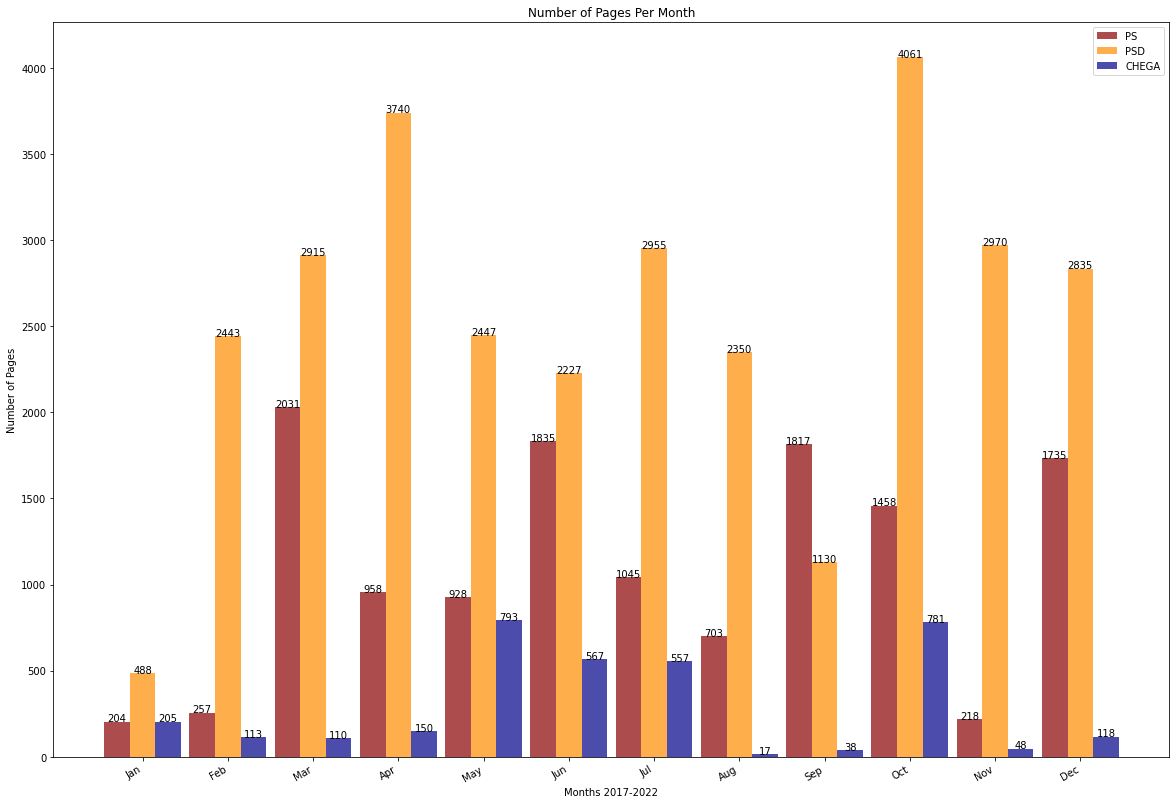

In [140]:
fig, ax = plt.subplots(figsize=(20, 15))
x_axis = np.arange(12)
width = 0.3

for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x - width, y), ha='center')
for x, y in enumerate(psd_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x, y), ha='center')
for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x + width, y), ha='center')

plt.bar(x_axis - width, ps_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis, psd_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkorange", label="PSD")
plt.bar(x_axis + width, ch_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkblue", label="CHEGA")

plt.xticks(x_axis, ps_pages['Month'].tolist())
plt.legend(["PS", "PSD", "CHEGA"])
plt.title('Number of Pages Per Month')
plt.xlabel('Months 2017-2022')
plt.ylabel('Number of Pages')

fig.autofmt_xdate()

plt.show()

### Number of Webpages Through Time per Political Groups

In [9]:
def pages_through_time(df):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    pages_through_time = group_by_year.count().reset_index()
    pages_through_time.rename({'date': 'Year', 'text': 'Number of Pages'}, axis='columns', inplace=True)

    return pages_through_time

In [10]:
ps_pages = pages_through_time(ps)
ps_pages

,Year,Number of Pages
0,2017,2090
1,2018,2405
2,2019,4926
3,2020,3767
4,2021,1


In [11]:
psd_pages = pages_through_time(psd)
psd_pages

,Year,Number of Pages
0,2017,9855
1,2018,6452
2,2019,10963
3,2020,3290
4,2021,1


In [12]:
ch_pages = pages_through_time(ch)
ch_pages

,Year,Number of Pages
0,2019,2781
1,2020,716


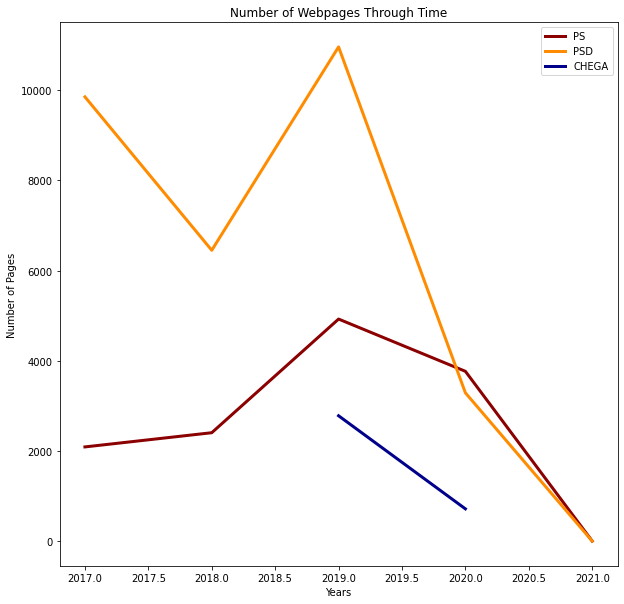

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.title("Number of Webpages Through Time")
plt.ylabel("Number of Pages")
plt.xlabel("Years")

plt.plot(ps_pages['Year'].tolist(), ps_pages['Number of Pages'].tolist(), color="darkred", linewidth=3)
plt.plot(psd_pages['Year'].tolist(), psd_pages['Number of Pages'].tolist(), color="darkorange", linewidth=3)
plt.plot(ch_pages['Year'].tolist(), ch_pages['Number of Pages'].tolist(), color="darkblue", linewidth=3)

plt.legend(["PS", "PSD", "CHEGA"])

plt.show()

### Number of Webpages of all Parties

In [37]:
pages_data = {'Number of Pages': [ps_pages['Number of Pages'].mean(), psd_pages['Number of Pages'].mean(), ch_pages['Number of Pages'].mean()],
              'Min': [ps_pages['Number of Pages'].min(), psd_pages['Number of Pages'].min(), ch_pages['Number of Pages'].min()],
              'Max': [ps_pages['Number of Pages'].max(), psd_pages['Number of Pages'].max(), ch_pages['Number of Pages'].max()]}
total_pages = pd.DataFrame(pages_data, ['PS', 'PSD', 'CH'])
total_pages

,Number of Pages,Min,Max
PS,2637.8,1,4926
PSD,6112.2,1,10963
CH,1748.5,716,2781


### Length of the Text per Month per Political Group

In [142]:
def length_stats_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    avg_text_lenght_per_month = group_by_month.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_month = group_by_month.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_month = group_by_month.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_month = group_by_month.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_month = pd.concat([avg_text_lenght_per_month, min_text_lenght_per_month, max_text_lenght_per_month, std_text_lenght_per_month], axis=1).reset_index()
    text_length_per_month.rename({'date': 'Month'}, axis='columns', inplace=True)
    text_length_per_month['Month'] = text_length_per_month['Month'].apply(lambda x: calendar.month_abbr[x])
    
    return text_length_per_month

In [143]:
ps_length_stats = length_stats_per_month(ps)
ps_length_stats

,Month,Average,Min,Max,Std
0,Jan,18118.485294,1471,735766,94222.468444
1,Feb,2999.894942,1,28423,2304.128072
2,Mar,4432.123584,30,98933,4650.839959
3,Apr,4293.602296,163,38477,3517.800210
4,May,4062.243534,168,77561,4160.081384
5,Jun,4431.382016,101,106268,4984.334202
6,Jul,5091.838278,134,460179,16089.532395
7,Aug,4455.702703,34,38544,3642.578166
8,Sep,4215.671436,42,77556,3927.197070
9,Oct,4952.757888,62,503713,18678.640539


In [144]:
psd_length_stats = length_stats_per_month(psd)
psd_length_stats

,Month,Average,Min,Max,Std
0,Jan,3496.655738,0,386417,22761.110542
1,Feb,4562.983217,0,664851,21307.425524
2,Mar,4155.739966,0,1214451,30033.850122
3,Apr,6062.555615,0,1214451,36103.632653
4,May,4822.082550,0,1214451,35873.935993
5,Jun,6044.823529,0,1214451,40051.458936
6,Jul,5778.649408,0,1214451,39126.827306
7,Aug,4748.490213,0,215981,12013.176973
8,Sep,3670.722124,0,904338,36320.665765
9,Oct,6279.373553,0,1214451,41048.733308


In [145]:
ch_length_stats = length_stats_per_month(ch)
ch_length_stats

,Month,Average,Min,Max,Std
0,Jan,20477.775610,0,151217,49770.620135
1,Feb,13022.132743,0,151528,40754.767682
2,Mar,6099.481818,0,151440,28244.886255
3,Apr,4684.740000,0,151258,24293.165491
4,May,1597.818411,0,151343,11097.568019
5,Jun,968.463845,0,44771,3523.089728
6,Jul,971.429084,0,44803,3545.340508
7,Aug,258.470588,0,3301,792.966887
8,Sep,4694.736842,0,155980,24893.364926
9,Oct,2528.898848,0,155988,14039.331579


### Length of the Text per Year per Political Group

In [4]:
def length_stats_per_year(df):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    avg_text_lenght_per_year = group_by_year.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_year = group_by_year.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_year = group_by_year.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_year = group_by_year.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_year = pd.concat([avg_text_lenght_per_year, min_text_lenght_per_year, max_text_lenght_per_year, std_text_lenght_per_year], axis=1).reset_index()
    text_length_per_year.rename({'date': 'Year'}, axis='columns', inplace=True)
    
    return text_length_per_year

In [22]:
ps_length_stats = length_stats_per_year(ps)
ps_length_stats

,Year,Average,Min,Max,Std
0,2017,5340.937321,1,735766,29999.801204
1,2018,4805.619543,101,503713,11778.446010
2,2019,4594.806537,152,468345,12412.193259
3,2020,4197.385984,174,77571,4102.870224
4,2021,1504.000000,1504,1504,0.000000


In [23]:
psd_length_stats = length_stats_per_year(psd)
psd_length_stats

,Year,Average,Min,Max,Std
0,2017,4377.847286,0,1214451,25207.862878
1,2018,4920.732641,0,1181592,26427.199457
2,2019,5430.798686,0,1214451,36459.754631
3,2020,11452.405775,0,664851,53777.147353
4,2021,313772.000000,313772,313772,0.000000


In [24]:
ch_length_stats = length_stats_per_year(ch)
ch_length_stats

,Year,Average,Min,Max,Std
0,2019,2363.383315,0,155988,14137.076642
1,2020,10983.244413,0,151528,37239.657320


### Total Length Stats

In [36]:
length_data = {'Length': [ps_length_stats['Average'].mean(), psd_length_stats['Average'].mean(), ch_length_stats['Average'].mean()],
                'Min': [ps_length_stats['Min'].min(), psd_length_stats['Min'].min(), ch_length_stats['Min'].min()],
                'Max': [ps_length_stats['Max'].max(), psd_length_stats['Max'].max(), ch_length_stats['Max'].max()]}
total_length = pd.DataFrame(length_data, ['PS', 'PSD', 'CH'])
total_length

,Length,Min,Max
PS,4088.549877,1,735766
PSD,67990.756878,0,1214451
CH,6673.313864,0,155988


### Length in Text Through Time

## Wordcloud

In [9]:
stop = stopwords.words('portuguese') + ["ser","quer","se","sobre","toda","assim","sendo"]

wordcloud_text=df["text"].str.replace("[$&+:;“”=?@#|'<>.^*()%!,\"\/]"," ",regex=True)
wordcloud_text=wordcloud_text.str.replace("\d","",regex=True)
wordcloud_text=wordcloud_text.str.replace(" +"," ",regex=True)


df_without_stopwords=" ".join(wordcloud_text)

df_without_stopwords=' '.join([word.lower() for word in df_without_stopwords.split(" ") if word.lower() not in (stop)])

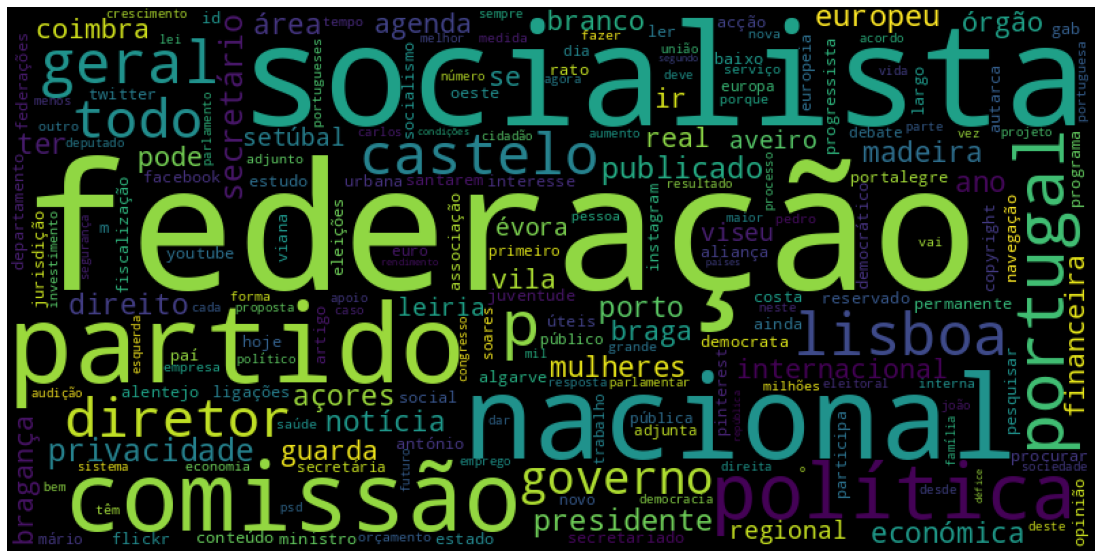

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(df_without_stopwords)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()